The Purpose of this notebook is to just find stocks that may be cointegrated

In [264]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

pyo.init_notebook_mode(connected=True)

pd.options.plotting.backend = 'plotly'

import statsmodels
from statsmodels.tsa.stattools import coint
# just set the seed for the random number generator
np.random.seed(107)

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

import matplotlib.pyplot as plt

In [2]:
def get_data(stocks, start, end):
    stockData = pdr.get_data_yahoo(stocks, start, end)
    stockData = stockData['Close']
    return stockData

# Get a list of stocks

In [29]:
# importing and formatting data to be readable from a list of top 50 asx mining companies 
df = pd.read_csv('mining_stocks.txt', sep='\t')
codes = df.drop(columns=['0.','Company','Market Cap', 'Share Price', '.91', '%_Change'])
stocks = list(codes['Code'])
stocks = [stock[4:] for stock in stocks]

stocks[0:10]

['BHP', 'FMG', 'RIO', 'NCM', 'JHX', 'S32', 'PLS', 'MIN', 'NST', 'AMC']

# Import the stocks

In [54]:
#fixing error
import yfinance as yfin
yfin.pdr_override()

end = dt.datetime(2023, 1, 1)
start = dt.datetime(2006,1,1)

stocksax = [stock + '.AX' for stock in stocks]

data = get_data(stocksax, start, end)
# drop all columns with nan values
data = data.dropna(axis=1)
data.head()

[*********************100%***********************]  50 of 50 completed


,ABC.AX,AMC.AX,AWC.AX,AZS.AX,BHP.AX,BKW.AX,BLD.AX,BSL.AX,CSR.AX,EMR.AX,...,JHX.AX,LYC.AX,NCM.AX,NUF.AX,PRU.AX,RIO.AX,RMS.AX,SFR.AX,SGM.AX,SYA.AX
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,2.05,5.795419,5.680609,2.648008,21.660353,12.75,7.489678,28.377531,9.352269,0.842286,...,8.88,0.869858,20.977732,10.963685,0.394550,55.130138,0.129506,0.122689,17.350000,0.812886
2006-01-04,2.03,5.819010,5.597182,2.648008,22.286428,12.82,7.600227,28.662121,9.431975,0.842286,...,8.80,0.869858,22.048719,10.887083,0.384686,56.045033,0.129506,0.122689,17.700001,0.812886
2006-01-05,2.09,5.826873,5.521339,2.458865,22.052818,12.80,7.498890,28.580809,9.617958,0.842286,...,8.78,0.897918,21.598225,10.820056,0.384686,55.051270,0.129506,0.122689,17.490000,0.812886
2006-01-06,2.06,5.842600,5.483418,2.648008,21.819208,13.00,7.637076,28.336876,9.564820,0.842286,...,8.78,0.897918,21.181730,10.772180,0.364958,54.262569,0.129506,0.122689,17.700001,0.812886
2006-01-09,2.07,5.944826,5.756451,2.553436,22.482660,12.90,7.683138,28.540154,9.936785,0.842286,...,8.80,0.897918,21.989220,10.934960,0.355095,55.350975,0.124525,0.122689,17.590000,0.758694


In [59]:
list(data.columns)

['ABC.AX',
 'AMC.AX',
 'AWC.AX',
 'AZS.AX',
 'BHP.AX',
 'BKW.AX',
 'BLD.AX',
 'BSL.AX',
 'CSR.AX',
 'EMR.AX',
 'EVN.AX',
 'IGO.AX',
 'ILU.AX',
 'IPL.AX',
 'JHX.AX',
 'LYC.AX',
 'NCM.AX',
 'NUF.AX',
 'PRU.AX',
 'RIO.AX',
 'RMS.AX',
 'SFR.AX',
 'SGM.AX',
 'SYA.AX']

# Find cointegrated pairs

In [41]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

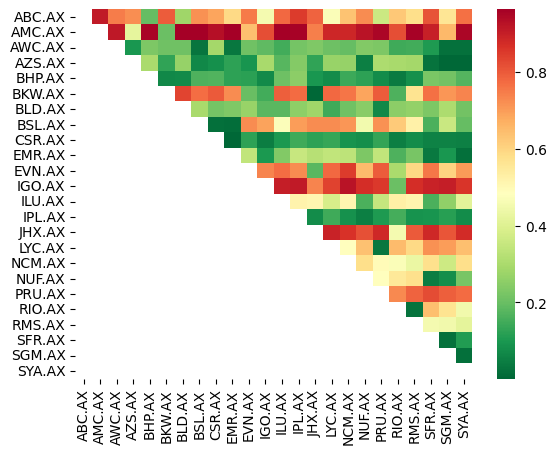

[('AWC.AX', 'BSL.AX'), ('AWC.AX', 'EMR.AX'), ('AWC.AX', 'SGM.AX'), ('AWC.AX', 'SYA.AX'), ('AZS.AX', 'NUF.AX'), ('AZS.AX', 'SFR.AX'), ('AZS.AX', 'SGM.AX'), ('AZS.AX', 'SYA.AX'), ('BHP.AX', 'RIO.AX'), ('BKW.AX', 'JHX.AX'), ('BSL.AX', 'CSR.AX'), ('BSL.AX', 'EMR.AX'), ('CSR.AX', 'EMR.AX'), ('CSR.AX', 'IGO.AX'), ('CSR.AX', 'RIO.AX'), ('EMR.AX', 'SFR.AX'), ('EMR.AX', 'SYA.AX'), ('IPL.AX', 'NUF.AX'), ('LYC.AX', 'PRU.AX'), ('NUF.AX', 'SFR.AX'), ('RIO.AX', 'RMS.AX'), ('SFR.AX', 'SGM.AX'), ('SGM.AX', 'SYA.AX')]


In [61]:
# Heatmap to show the p-values of the cointegration test
# between each pair of stocks
pairs=[]
scores, pvalues, pairs = find_cointegrated_pairs(data)
stockNames = list(data.columns)
import seaborn
m = [0,0.2,0.4,0.6,0.8,1]
seaborn.heatmap(pvalues, xticklabels=stockNames, 
                yticklabels=stockNames, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.98)
                )
plt.show()
print(pairs)

In [63]:
# finding the smallest p value
target = pvalues.min()
shape = np.shape(pvalues)
for r in range(shape[0]): # row
    for c in range(shape[1]): # column
        if pvalues[r][c] == target:
            print(stockNames[r], stockNames[c])
            print(target)
# score1, pvalue1 = coint(data['S32.AX'], data['ORI.AX'])



BKW.AX JHX.AX
0.0010952863567967187


Seems that BKW and JHX are the most cointegrated
# Graphing!

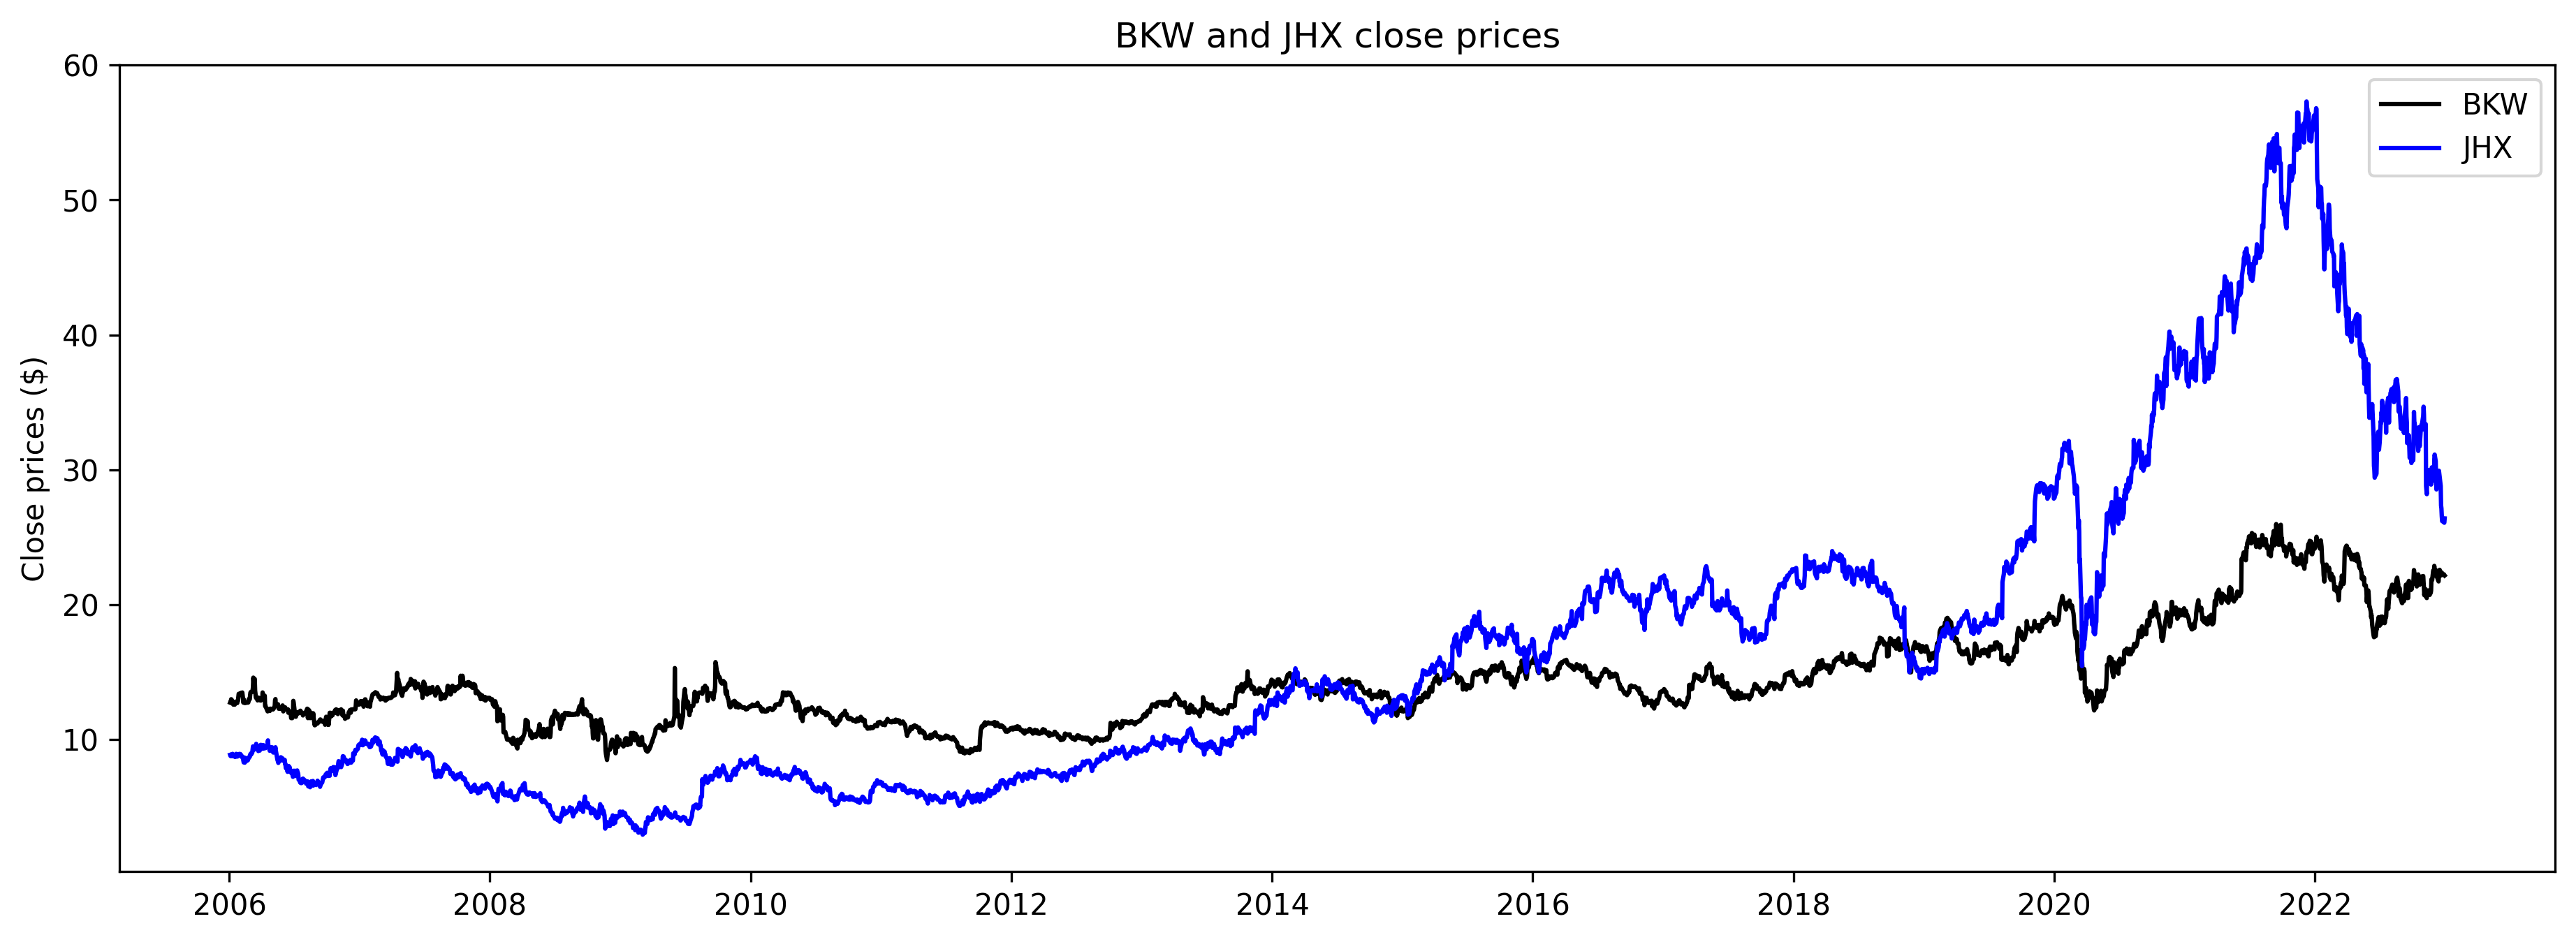

In [269]:
# Plot the two stocks
plt.figure(figsize=(15,5))
plt.plot(data.index, data["BKW.AX"], color='black')
plt.plot(data.index, data["JHX.AX"], color='blue')


plt.legend(['BKW', 'JHX'])
plt.title('BKW and JHX close prices')
plt.ylabel('Close prices ($)')
plt.show()

lets take a look at their ratio

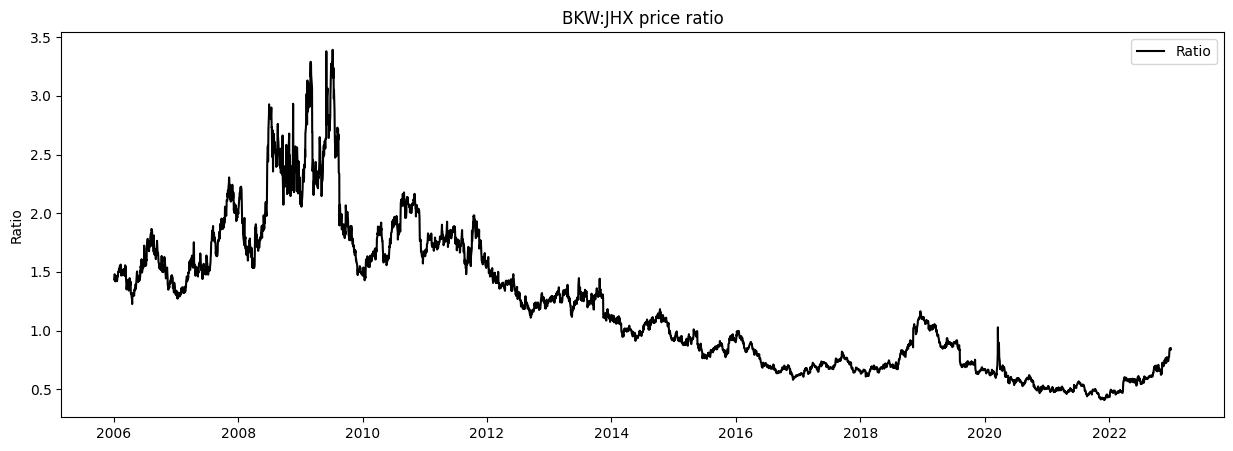

In [153]:
ratio = data['BKW.AX']/data['JHX.AX']

# Plot the ratio
plt.figure(figsize=(15,5))
plt.plot(ratio.index, ratio, color='black')

plt.legend(['Ratio'])
plt.title("BKW:JHX price ratio")
plt.ylabel('Ratio')
plt.show()


# Normalising the data
this will be initially done with a default window size of 30 days

what is rolling beta?

at the moment choosing to deal with the ratio rather than the spread

In [89]:
def moving_data(data, window, std=False, z=False, min_periods=None):
    # min periods is to prevent having no data at start
    d_ma = data.rolling(window=window, center=False, min_periods=None).mean()
    if std or z:
        d_std = data.rolling(window=window, center=False, min_periods=None).std()
        if std:
            return d_ma, d_std
    if z:
        d_z = (data-d_ma)/d_std
        return d_ma, d_std, d_z
    return d_ma

ratio_ma, ratio_std, ratio_z = moving_data(ratio, 30, z=True)

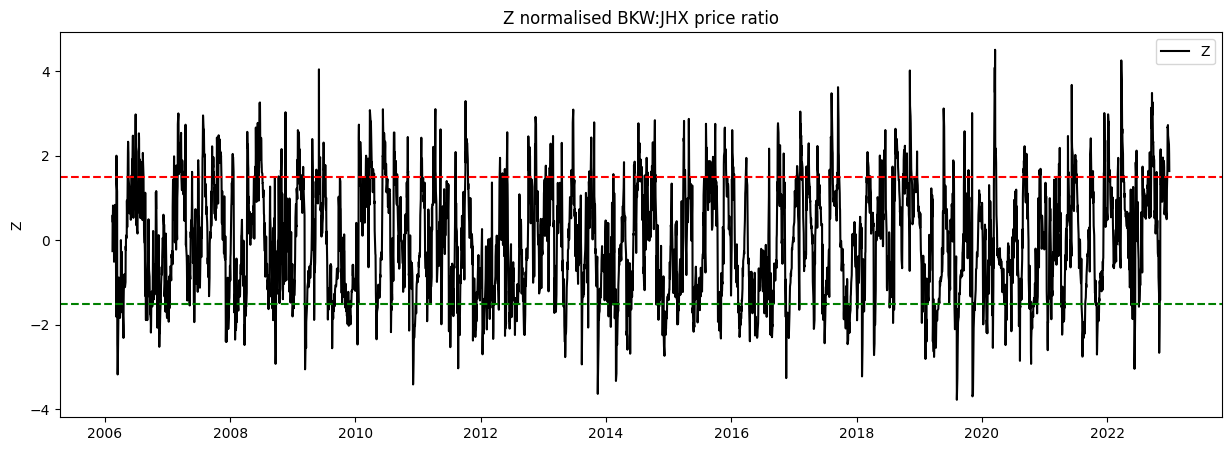

In [96]:
# Plot the normalised ratio (30 day window)
plt.figure(figsize=(15,5))
plt.plot(ratio_z.index, ratio_z.values, color='black')
plt.axhline(1.5, color='red', linestyle='--')
plt.axhline(-1.5, color='green', linestyle='--')

plt.legend(['Z'])
plt.title("Z normalised BKW:JHX price ratio")
plt.ylabel('Z')
plt.show()

# Testing and Training Data
70% training and 30% testing

In [182]:
# making the train test split
train_amount = int(round(len(ratio)*0.7, 0))
test_amount = len(ratio) - train_amount

train = ratio[:train_amount]
test = ratio[train_amount:]

train_MA, train_STD, train_Z = moving_data(train, 30, z=True)
test_MA, test_STD, test_Z = moving_data(test, 30, z=True)

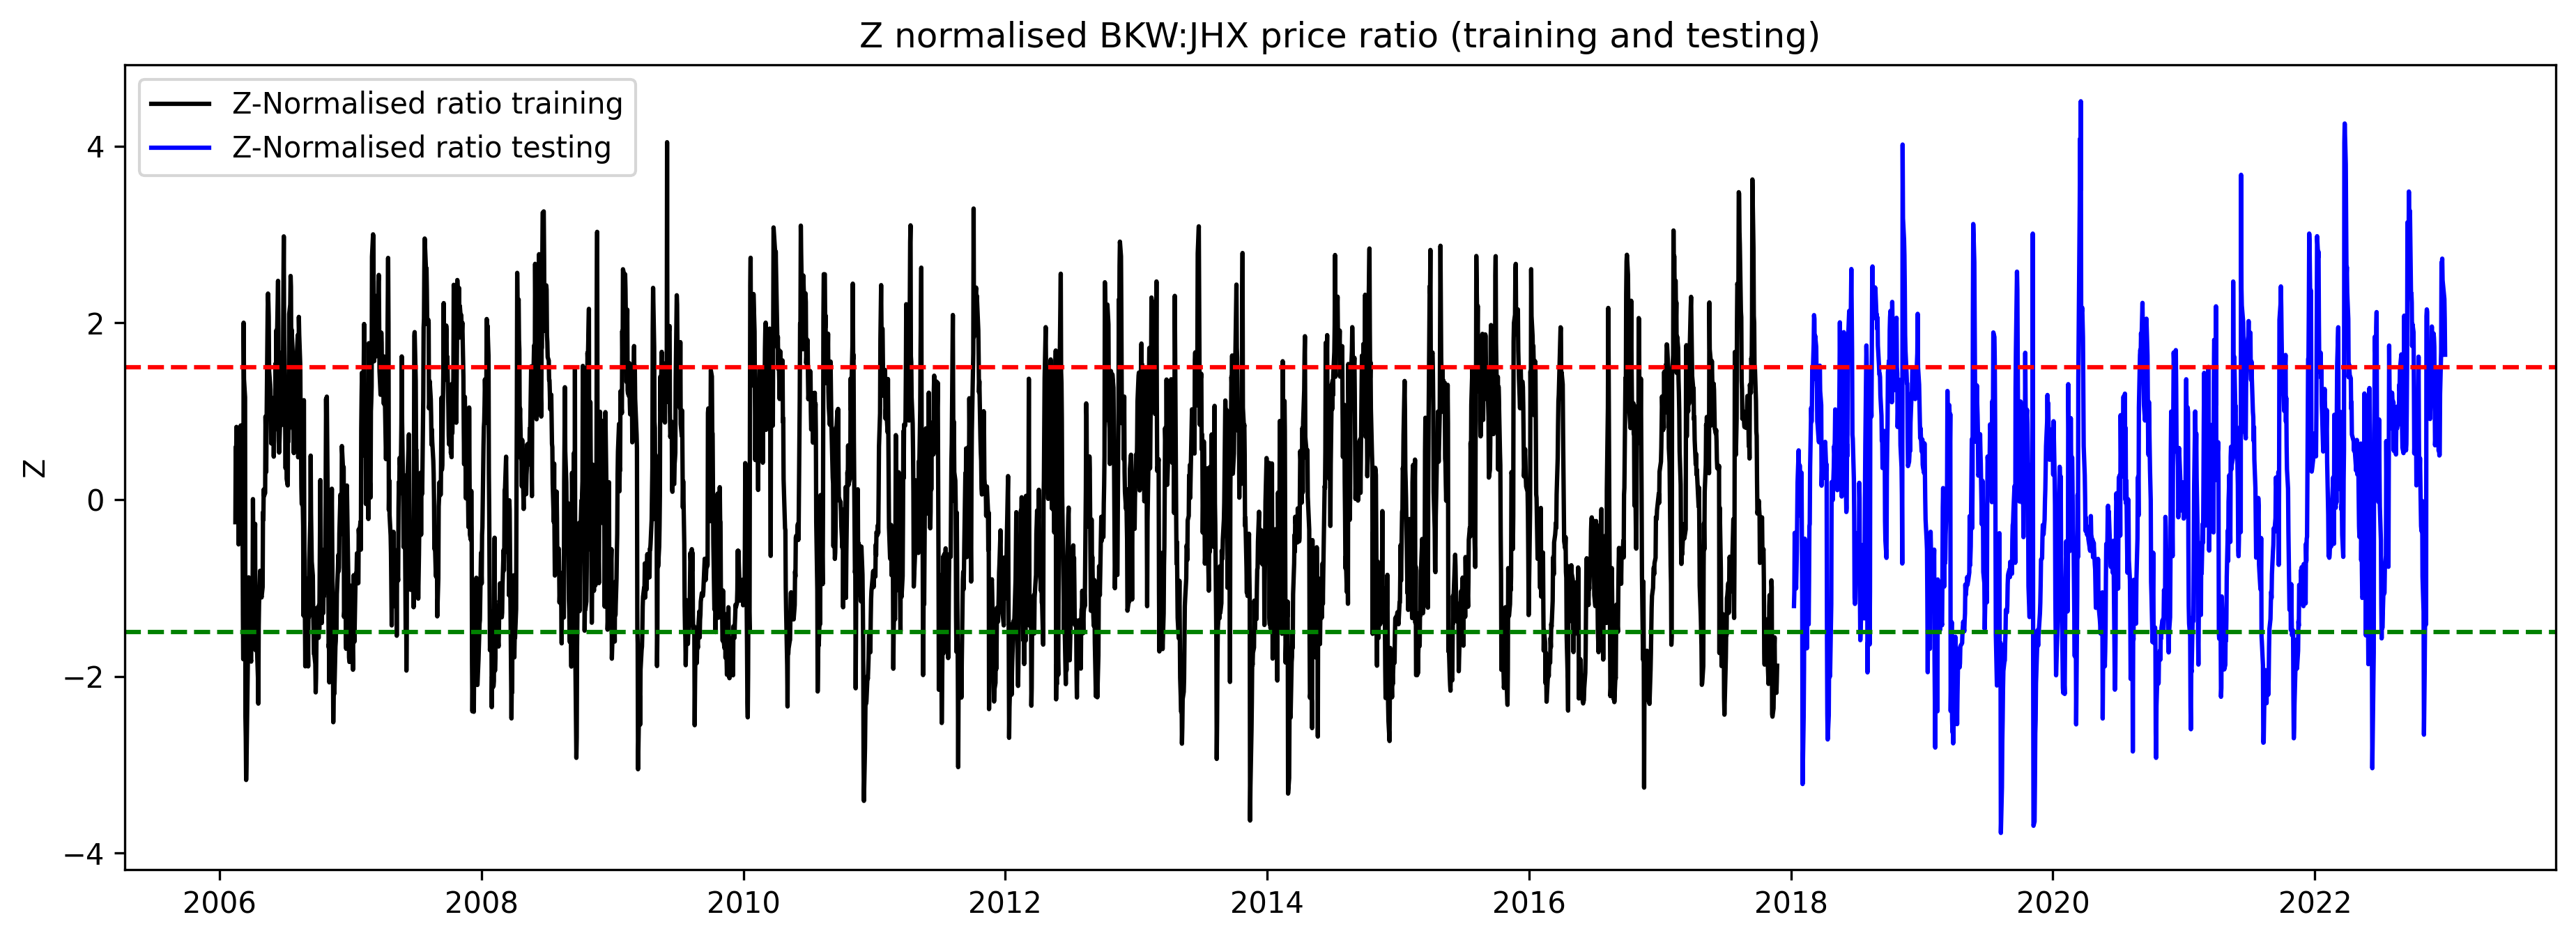

In [270]:
# Plot the test train split
plt.figure(figsize=(15,5))
plt.plot(train.index, train_Z.values, color='black')
plt.plot(test.index, test_Z.values, color='blue')
plt.axhline(1.5, color='red', linestyle='--')
plt.axhline(-1.5, color='green', linestyle='--')

plt.legend(["Z-Normalised ratio training", "Z-Normalised ratio testing"])
plt.title("Z normalised BKW:JHX price ratio (training and testing)")
plt.ylabel('Z')
plt.show()

# Markers

- Go "Long" the ratio whenever the z-score is below -1.5
- Go "Short" the ratio when the z-score is above 1.5
- Exit positions when the z-score approaches zero

eventually it would be good to optimise how many shares to hold of BKW and JHX

Firstly, add some signals

In [172]:
def buy_sell_markers(data, threshold):
    buy = train.copy()
    sell = train.copy()

In [211]:
threshold = 1.5 # the threshold z value
train_buy = train.copy()
sell = train.copy()
# exit_pos = train_z.copy()

# add the buy and sell signals 
# the normal signal is for the ratio and the _Z is to display the z score
train_buy = train.mask(train_Z > -threshold, None)
train_buy_Z = train_Z.mask(train_Z > -threshold, None)

train_sell = train.mask(train_Z < threshold, None)
train_sell_Z = train_Z.mask(train_Z < threshold, None)

# sell = sell.apply(lambda x: None if x < threshold else x)
train_buy.tail()

Date
2017-11-17    0.665090
2017-11-20    0.661298
2017-11-21    0.645251
2017-11-22    0.642492
2017-11-23    0.643256
dtype: float64

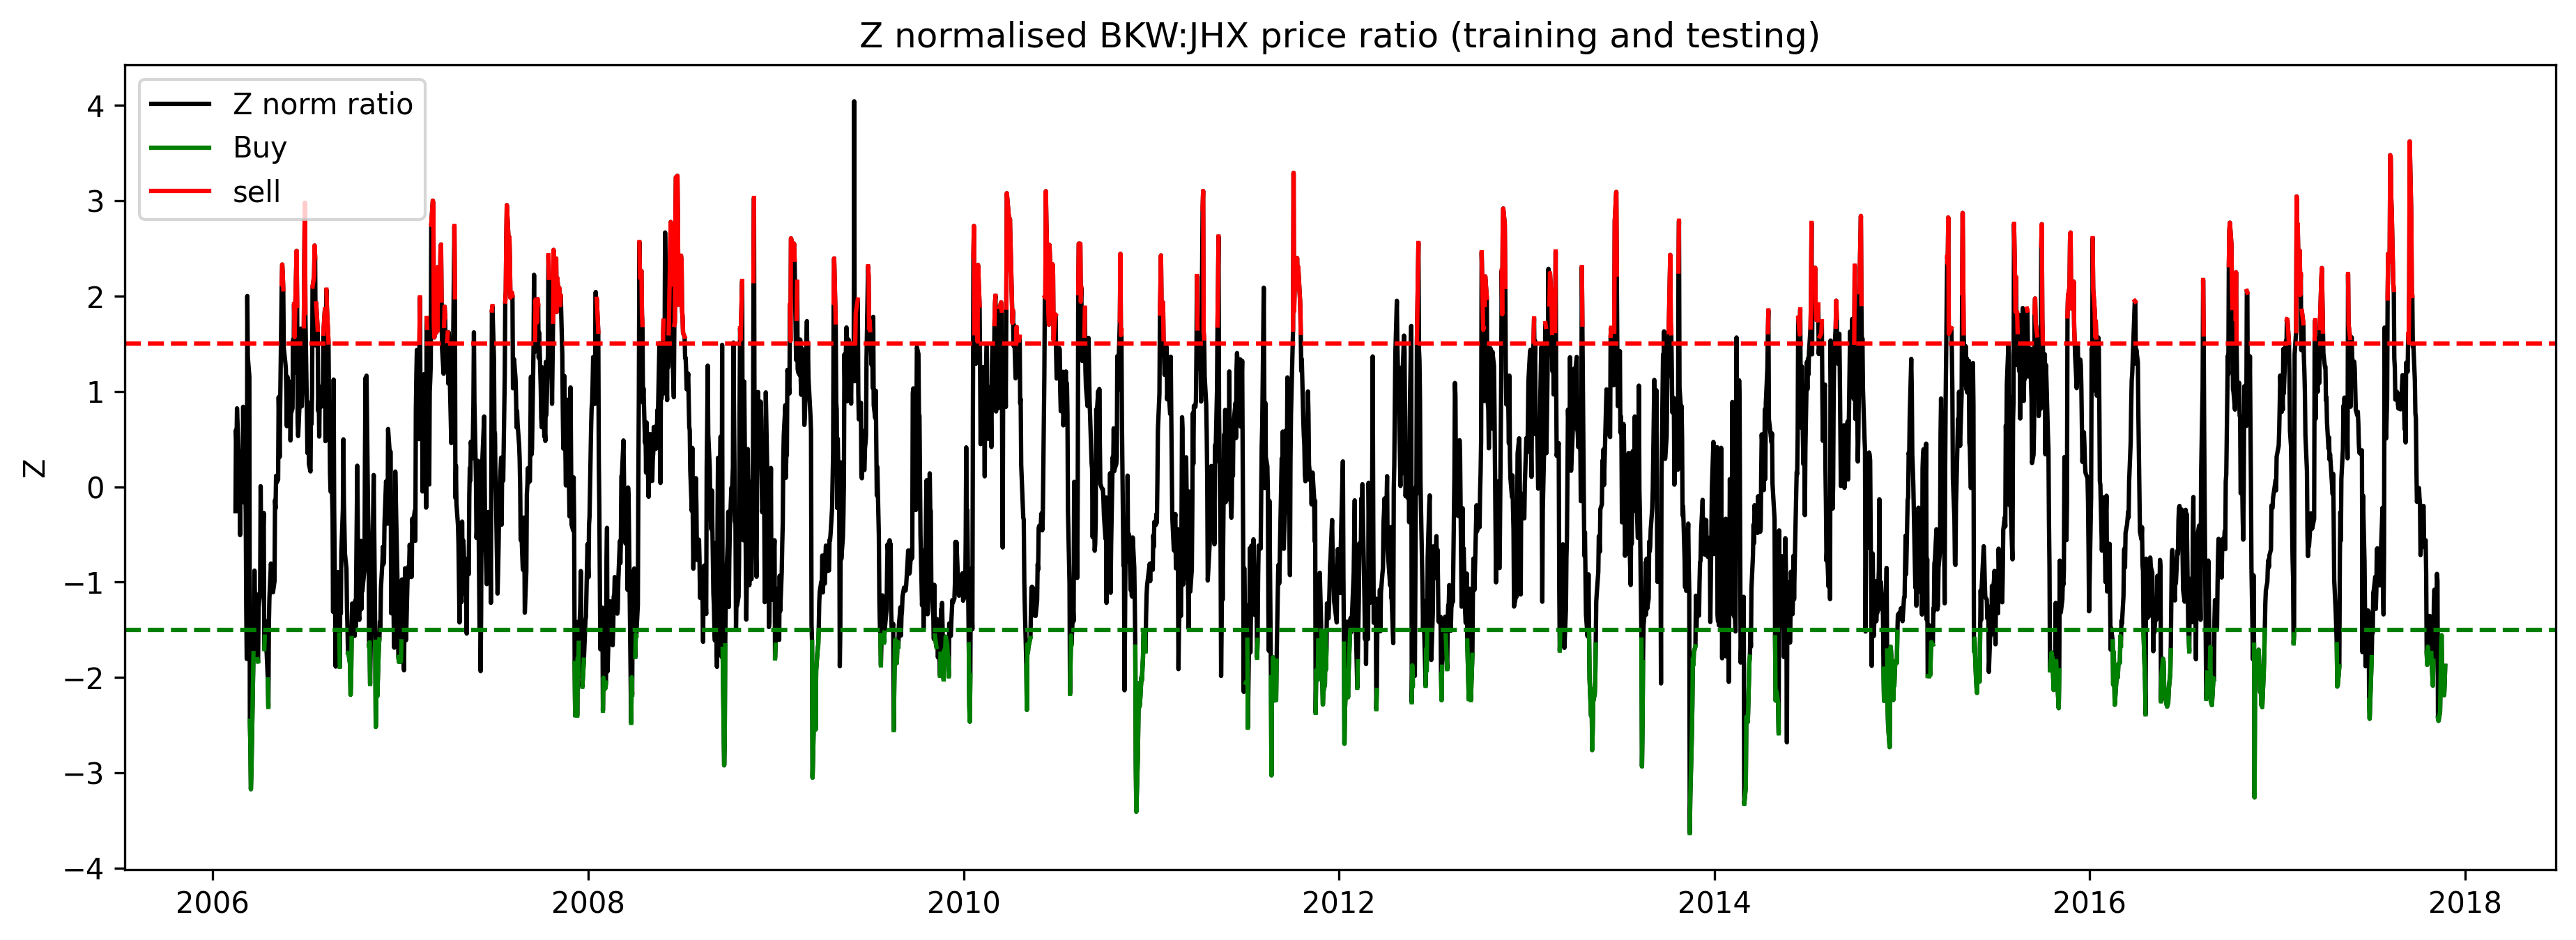

In [268]:
# Plot the buy and sell times 
plt.figure(figsize=(15,5))
plt.plot(train_Z.index, train_Z.values, color='black')
plt.plot(train_buy_Z.index, train_buy_Z.values, color='green')
plt.plot(train_sell_Z.index, train_sell_Z.values, color='red')
plt.axhline(1.5, color='red', linestyle='--')
plt.axhline(-1.5, color='green', linestyle='--')

plt.legend(["Z norm ratio", "Buy", "sell"])
plt.title("Z normalised BKW:JHX price ratio (training and testing)")
plt.ylabel('Z')
plt.show()

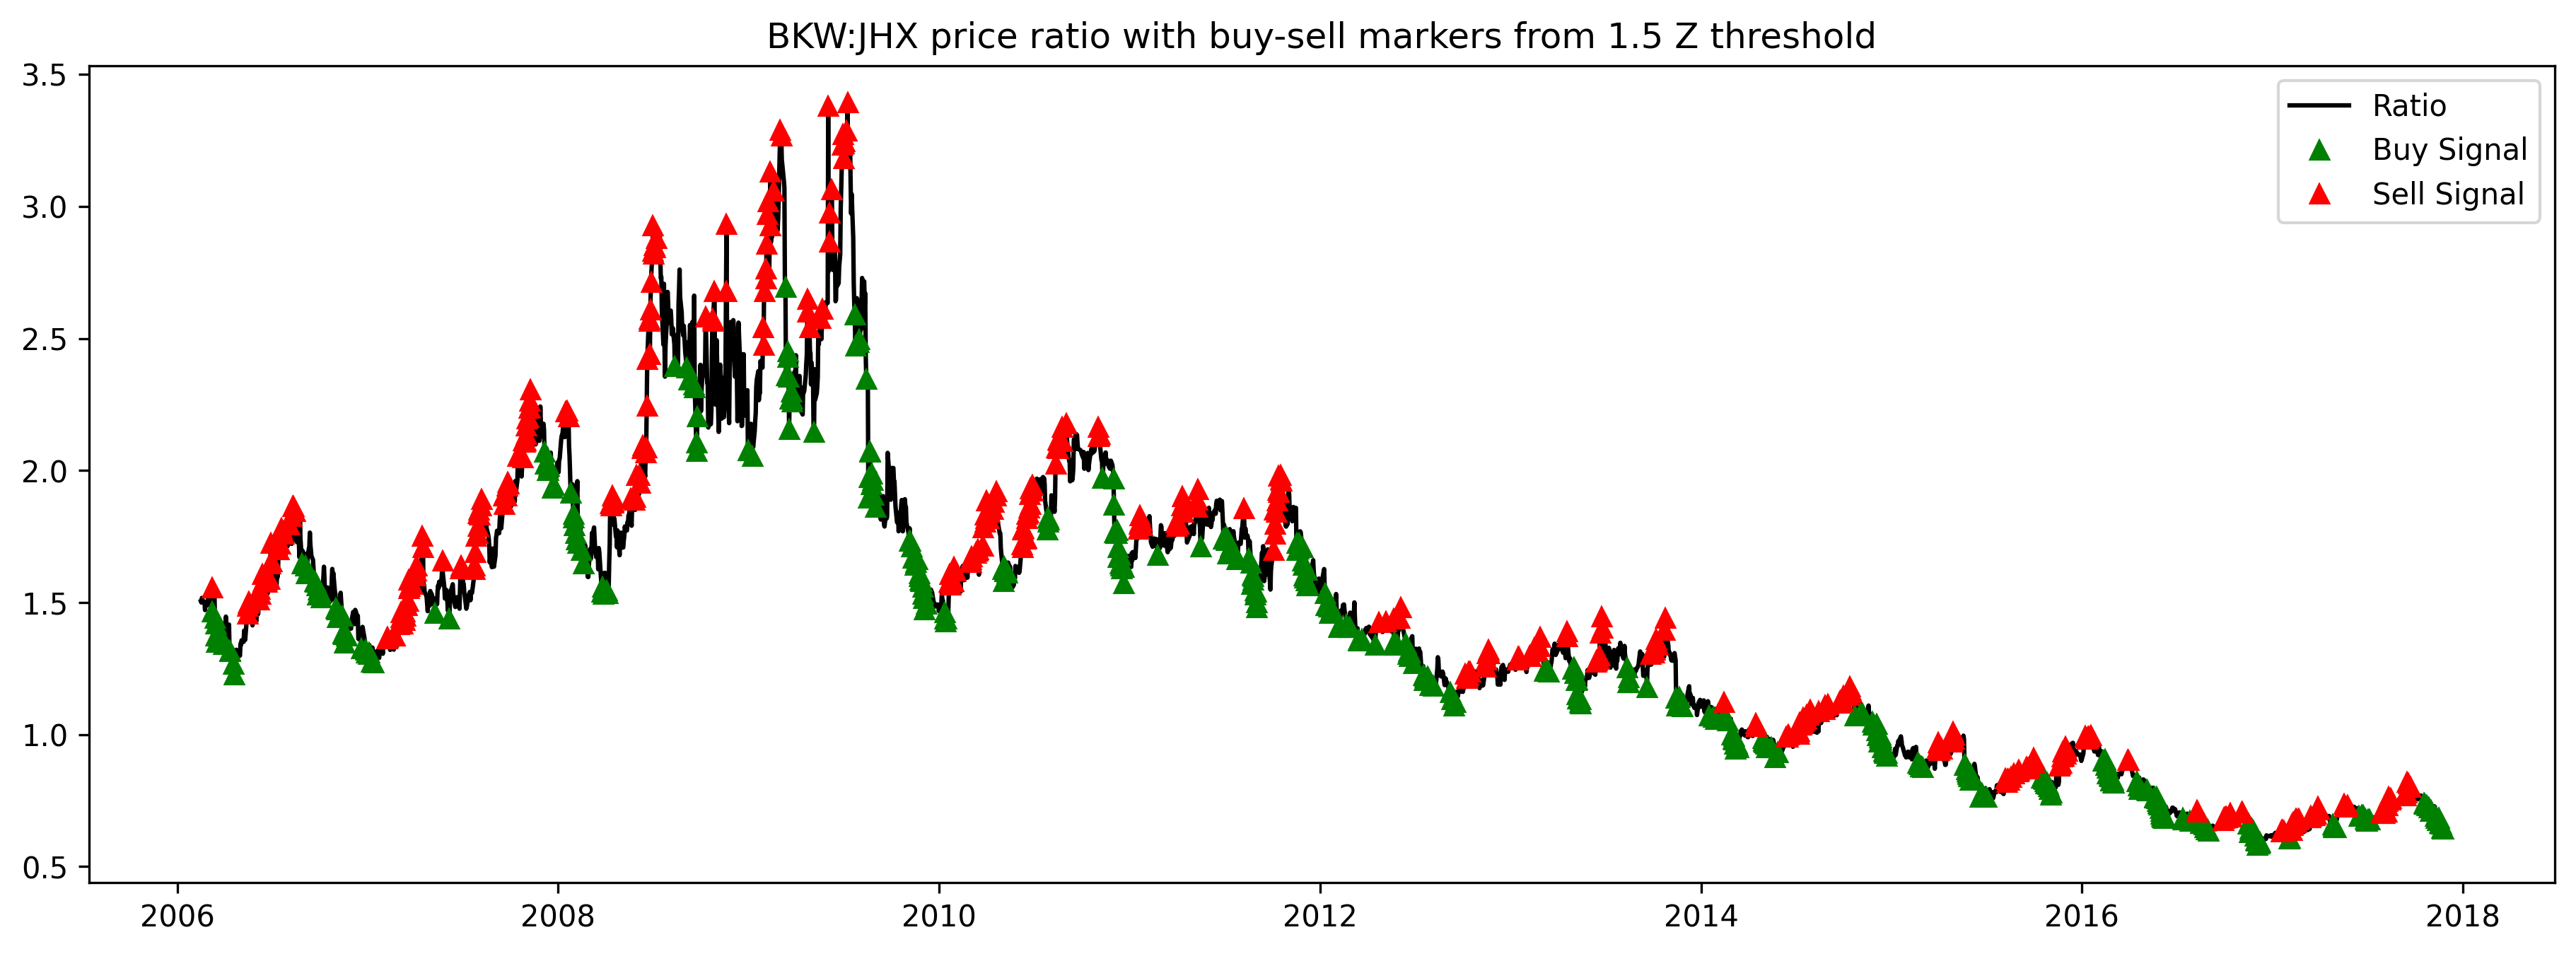

In [265]:
# graphing the ratios with the markers
plt.figure(figsize=(15,5))

# only start after 30 days because that is when the moving averages "start"
plt.title("BKW:JHX price ratio with buy-sell markers from 1.5 Z threshold")
plt.plot(train[30:].index, train[30:].values, color='black')
plt.plot(train_buy[30:].index, train_buy[30:].values, color='green', linestyle='None', marker='^')
plt.plot(train_sell[30:].index, train_sell[30:].values, color='red', linestyle='None', marker='^')
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

# Buying and Selling the stock

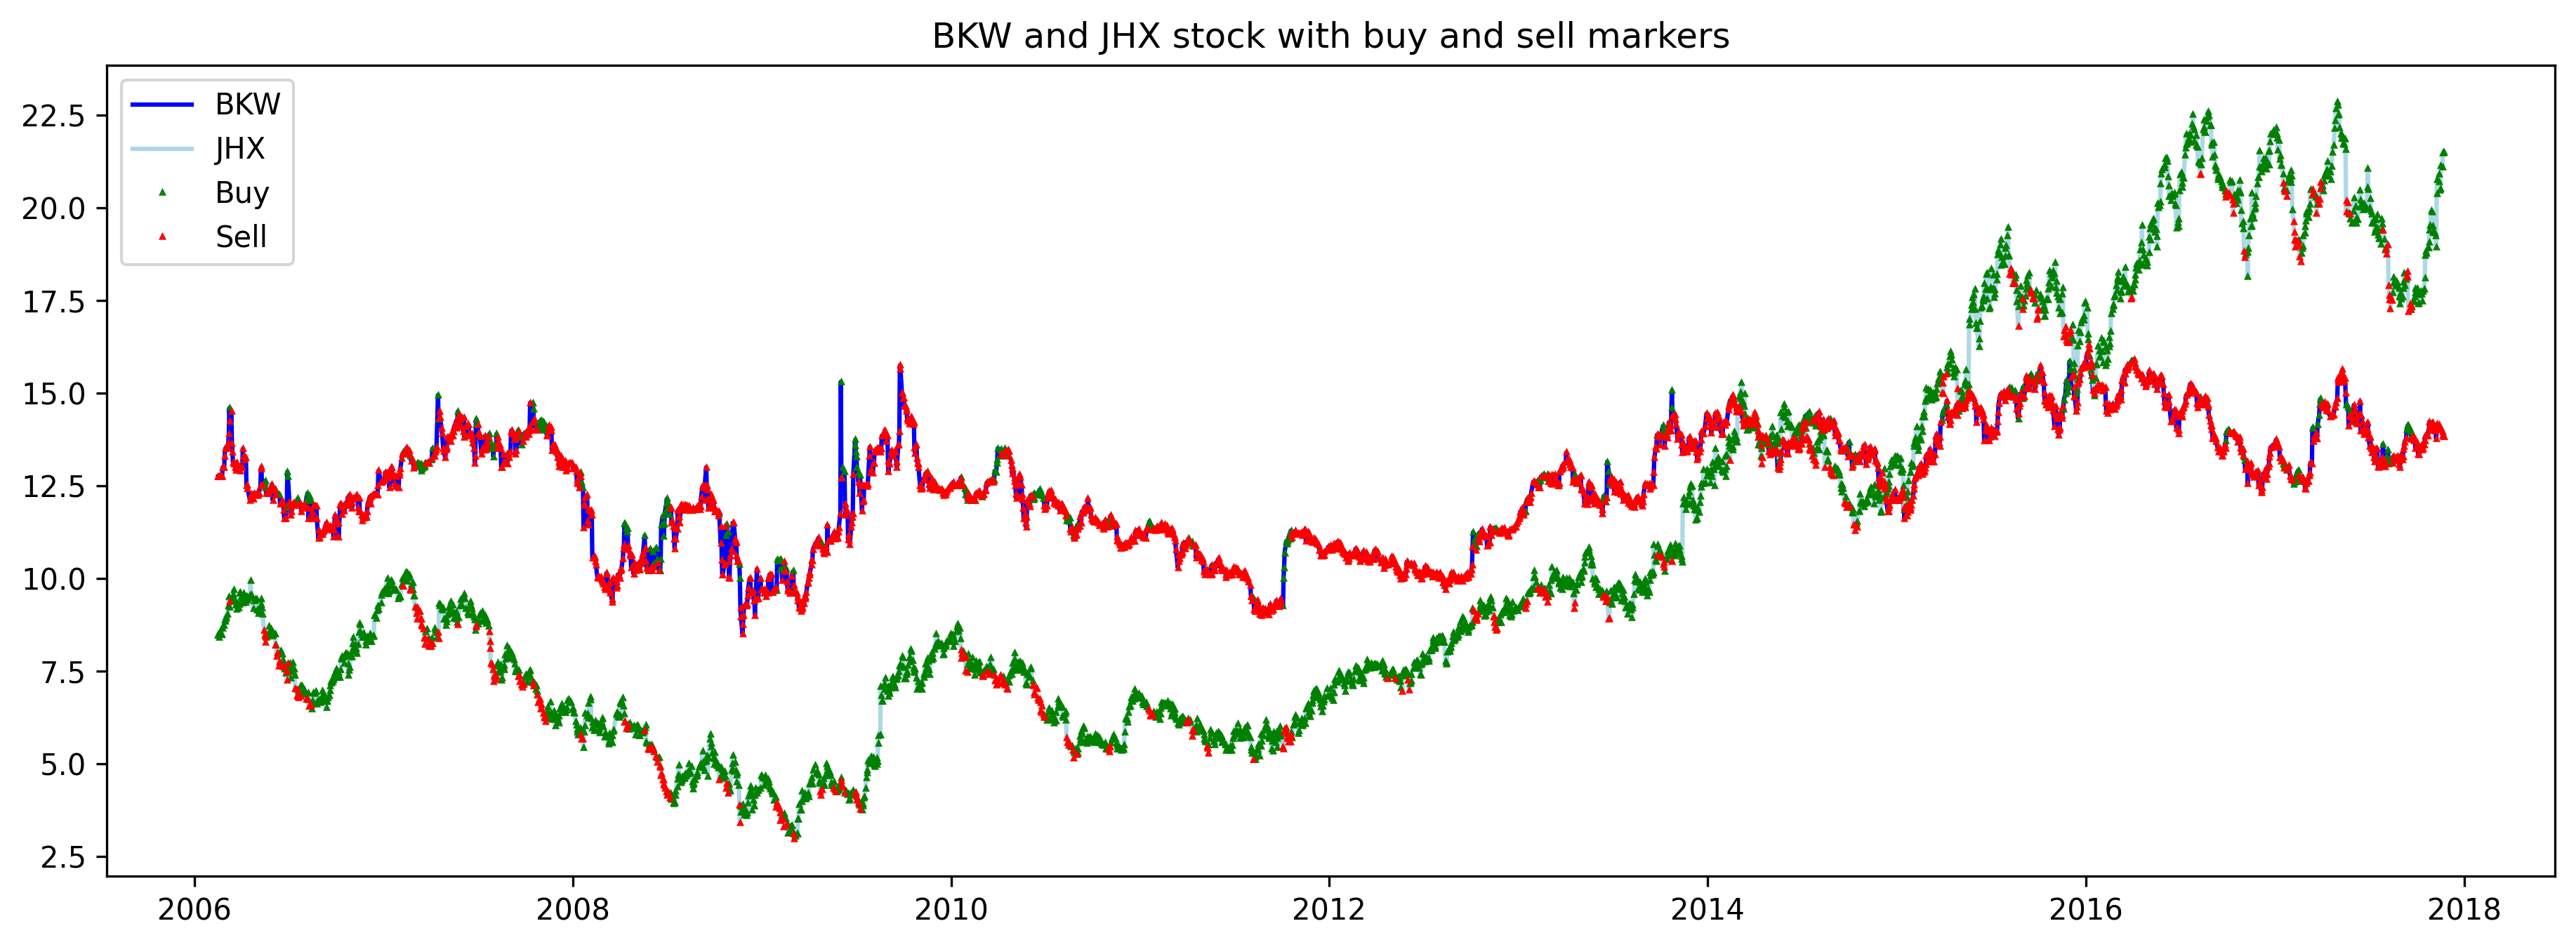

In [267]:
# get the two stocks, 
S1 = data["BKW.AX"][:train_amount]
S2 = data["JHX.AX"][:train_amount]

# graphing the two stocks
plt.figure(figsize=(15,5))

train_buyR = 0*S1.copy()
train_sellR = 0*S1.copy()
# When buying the ratio, buy S1 (BKW) and sell S2 (JHX)
train_buyR[train_buy.isna()] = S1[train_buy.isna()]
train_sellR[train_buy.isna()] = S2[train_buy.isna()]
# When selling the ratio, sell S1 and buy S2 
train_buyR[train_sell.isna()] = S2[train_sell.isna()]
train_sellR[train_sell.isna()] = S1[train_sell.isna()]


# only start after 30 days because that is when the moving averages "start"
# plt.title("BKW:JHX price ratio with buy-sell markers from 1.5 Z threshold")
plt.plot(S1[30:].index, S1[30:].values, color='blue')
plt.plot(S2[30:].index, S2[30:].values, color='lightblue')
plt.plot(train_buyR[30:].index, train_buyR[30:].values, color='green', linestyle='None', marker='^', markersize=1)
plt.plot(train_sellR[30:].index, train_sellR[30:].values, color='red', linestyle='None', marker='^', markersize=1)
plt.title("BKW and JHX stock with buy and sell markers")
plt.legend(['BKW', 'JHX', 'Buy', 'Sell'])
plt.show()

# Calculating Returns

Calculate returns by constructing a simple backtester to:
- buy ratio when z score of the ratio is low (buy 1 BKW stock and sell ratio * JHX stock)
- sell ratio when z score of the ratio is high (sell 1 BKW stock and buy ratio * JHX stock)
- exit positions if the z score of the ratio is around 0

and calculate the PnL for these

In [395]:
def trade(S1, S2, window, threshold, exit_threshold, start_S1=0, start_S2=0): # use the testing data for S1 and S2
    S1 = S1[window:]
    S2 = S2[window:]
    ratio = S1/S2
    r_MA, r_STD, r_Z = moving_data(ratio, window, z=True)

    # variables for graphing
    returns_S = 0*ratio.copy()
    amount_S1_S = 0*ratio.copy()
    amount_S2_S = 0*ratio.copy()
    buyR_S = 0*ratio.copy()
    sellR_S = 0*ratio.copy()

    # Simulate trading
    returns = 0
    amount_S1 = start_S1
    amount_S2 = start_S2
    initial = returns + amount_S1*S1[0] + amount_S2*S2[0]
    for i in range(len(ratio)):
        # sell the ratio if above the threshold, buy one S1 and sell one ratio*S2
        if r_Z[i] > threshold:
            # the returns are the price of S1 - the price of S2 * the amount of S2 bought
            returns += S1[i] - ratio[i]*S2[i]
            amount_S1 -= 1
            amount_S2 += ratio[i]*1
            sellR_S[i] = ratio[i]
            
        # buy the ratio 
        elif r_Z[i] < -threshold:
            # the returns is the cost of buying S1 + the returns of selling S2 * the amount of S2 sold
            returns += -S1[i] + ratio[i]*S2[i]
            amount_S1 += 1
            amount_S2 -= ratio[i]*1
            buyR_S[i] = ratio[i]

        # exit positions
        elif abs(r_Z[i]) < exit_threshold:
            returns += amount_S1*S1[i] + amount_S2*S2[i]
            amount_S1 = 0
            amount_S2 = 0
        
        # add values to time series
        returns_S[i] = returns
        amount_S1_S[i] = amount_S1
        amount_S2_S[i] = amount_S2

    total_returns = returns + amount_S1*S1[-1] + amount_S2*S2[-1]

    # return total returns, cash returns, anmount of S1 stock, amount of S2 stock, time series
    # output = {"Data":{"Total Returns":total_returns,"Returns"}}
    return total_returns, returns, amount_S1, amount_S2, initial, returns_S, amount_S1_S, amount_S2_S, buyR_S, sellR_S, ratio        

# Test over the training data

In [452]:
train_amount = int(round(len(data["BKW.AX"])*0.7, 0))
test_amount = len(ratio) - train_amount

S1 = data["BKW.AX"][:train_amount]
S2 = data["JHX.AX"][:train_amount]
window = 100
threshold = 0.75
exit_threshold = 0.5

total_returns, returns, amount_S1, amount_S2, initial, returns_S, amount_S1_S, amount_S2_S, buyR_S, sellR_S, ratio = trade(S1, S2, window, threshold, exit_threshold)
total_returns

506.37088630260143

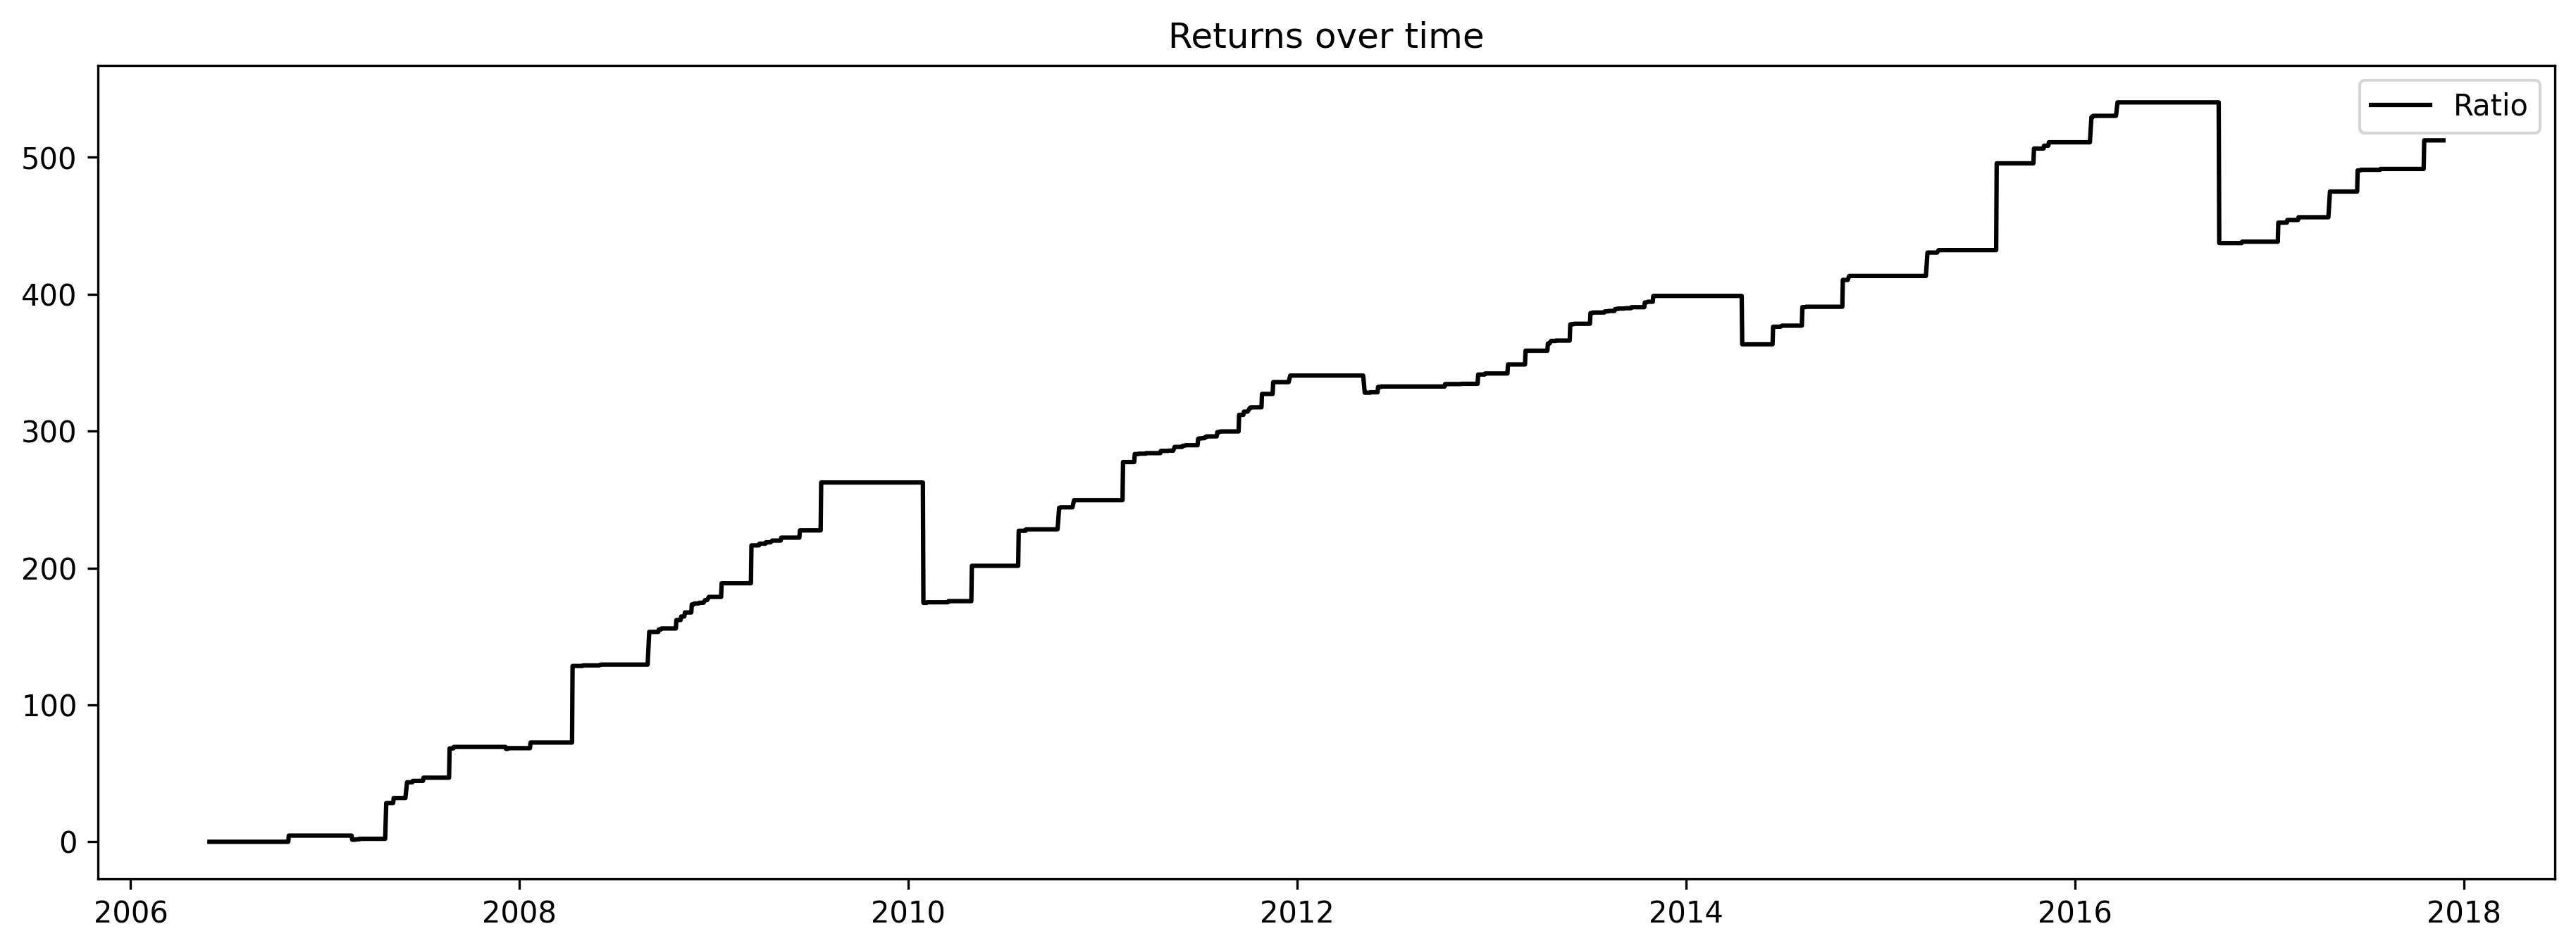

In [453]:
# graphing the returns over time
plt.figure(figsize=(15,5))

# only start after 30 days because that is when the moving averages "start"
plt.title("Returns over time")
plt.plot(returns_S.index, returns_S.values, color='black')
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

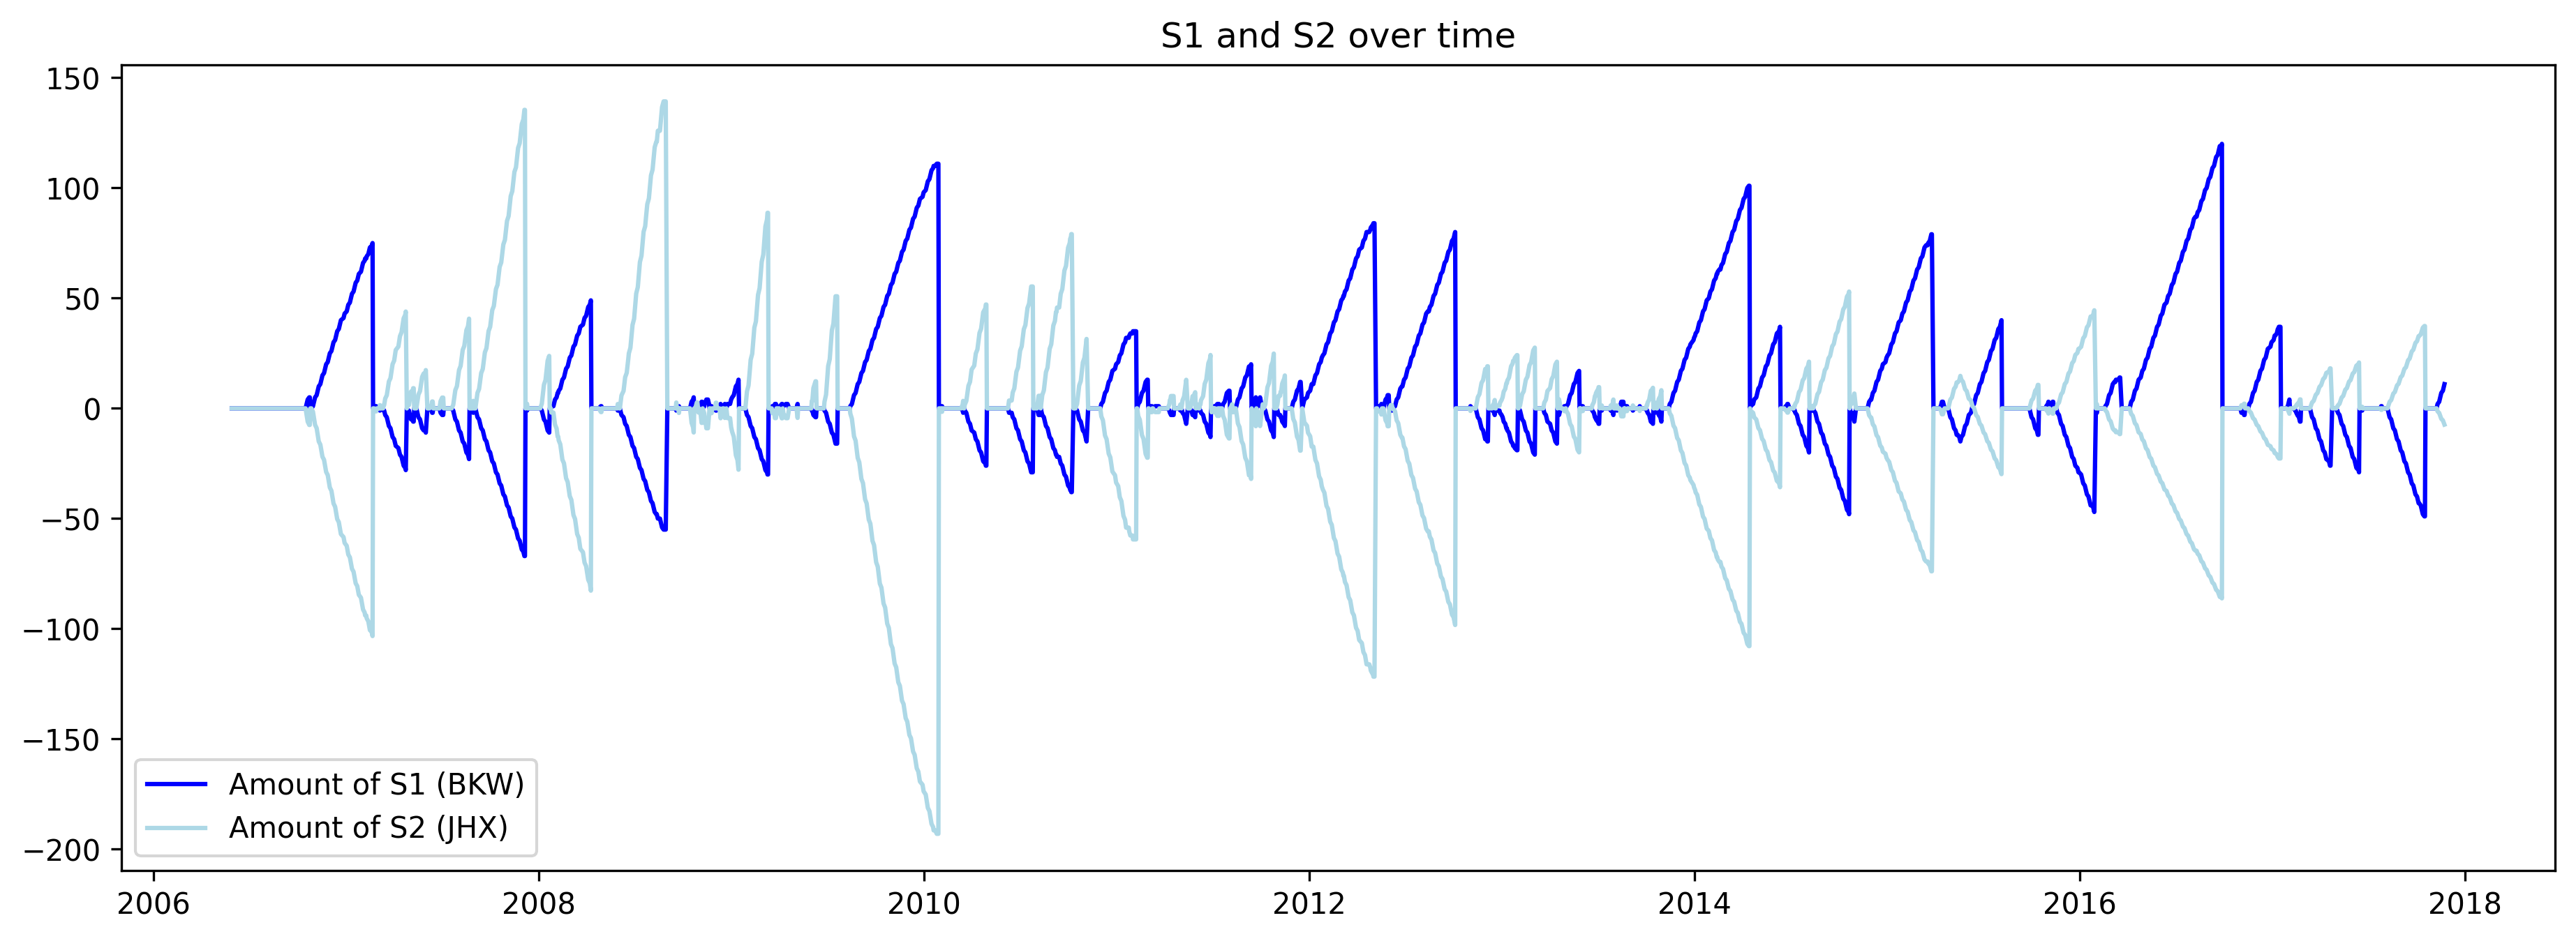

In [454]:
# graphing the ratios with the markers
plt.figure(figsize=(15,5))

# only start after 30 days because that is when the moving averages "start"
plt.title("S1 and S2 over time")
plt.plot(amount_S1_S.index, amount_S1_S.values, color='blue')
plt.plot(amount_S2_S.index, amount_S2_S.values, color='lightblue')
plt.legend(['Amount of S1 (BKW)', 'Amount of S2 (JHX)'])
plt.show()

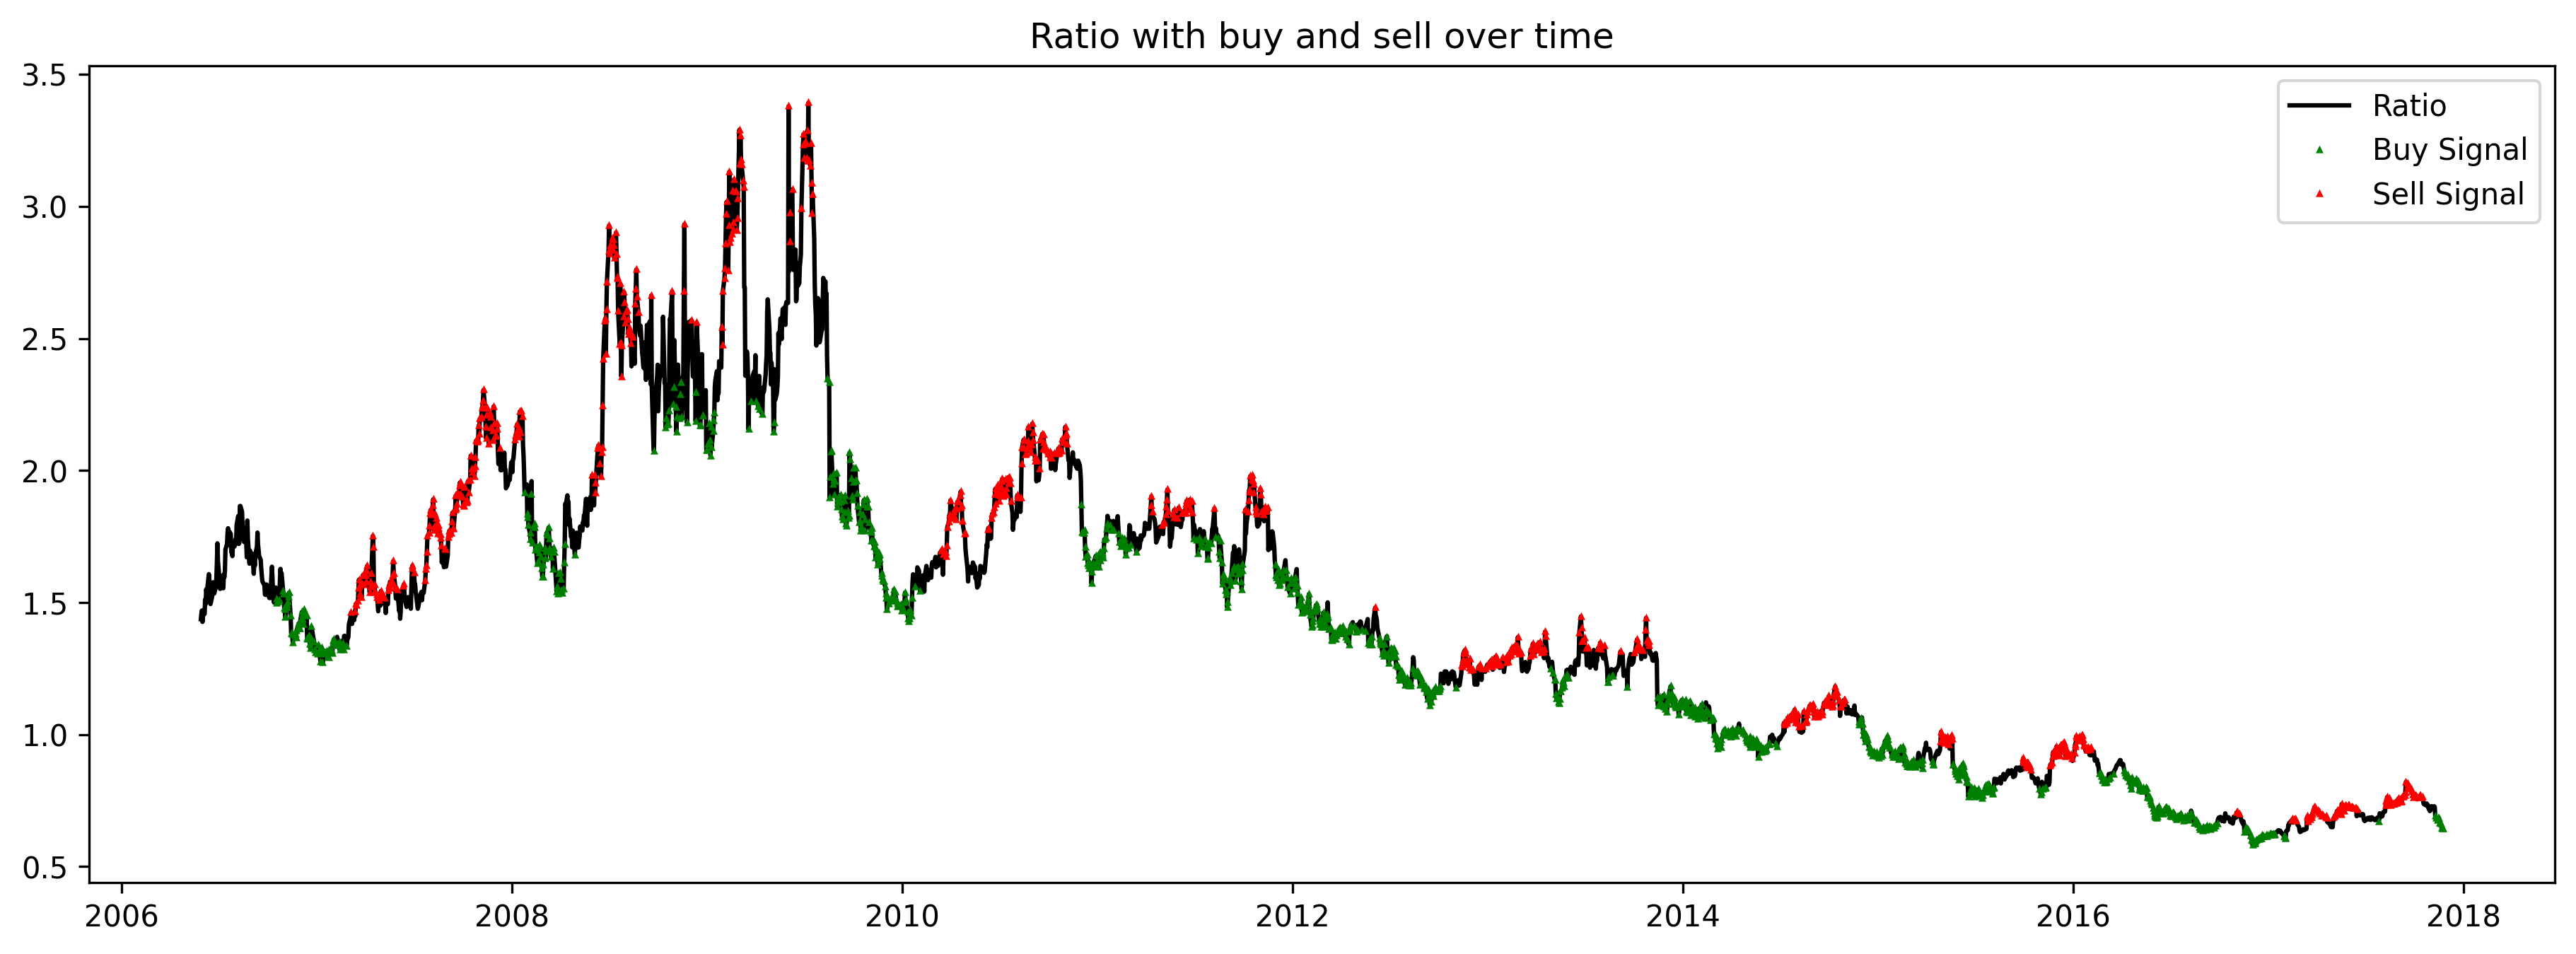

In [455]:
# graphing the returns over time
plt.figure(figsize=(15,5))

# only start after 30 days because that is when the moving averages "start"
plt.title("Ratio with buy and sell over time")
plt.plot(ratio.index, ratio.values, color='black')
plt.plot(buyR_S.where(buyR_S>0).index, buyR_S.where(buyR_S>0).values, color='green', linestyle='None', marker='^', markersize=1)
plt.plot(sellR_S.where(sellR_S>0).index, sellR_S.where(sellR_S>0).values, color='red', linestyle='None', marker='^', markersize=1)
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

# Testing Data

$213.54061965388337


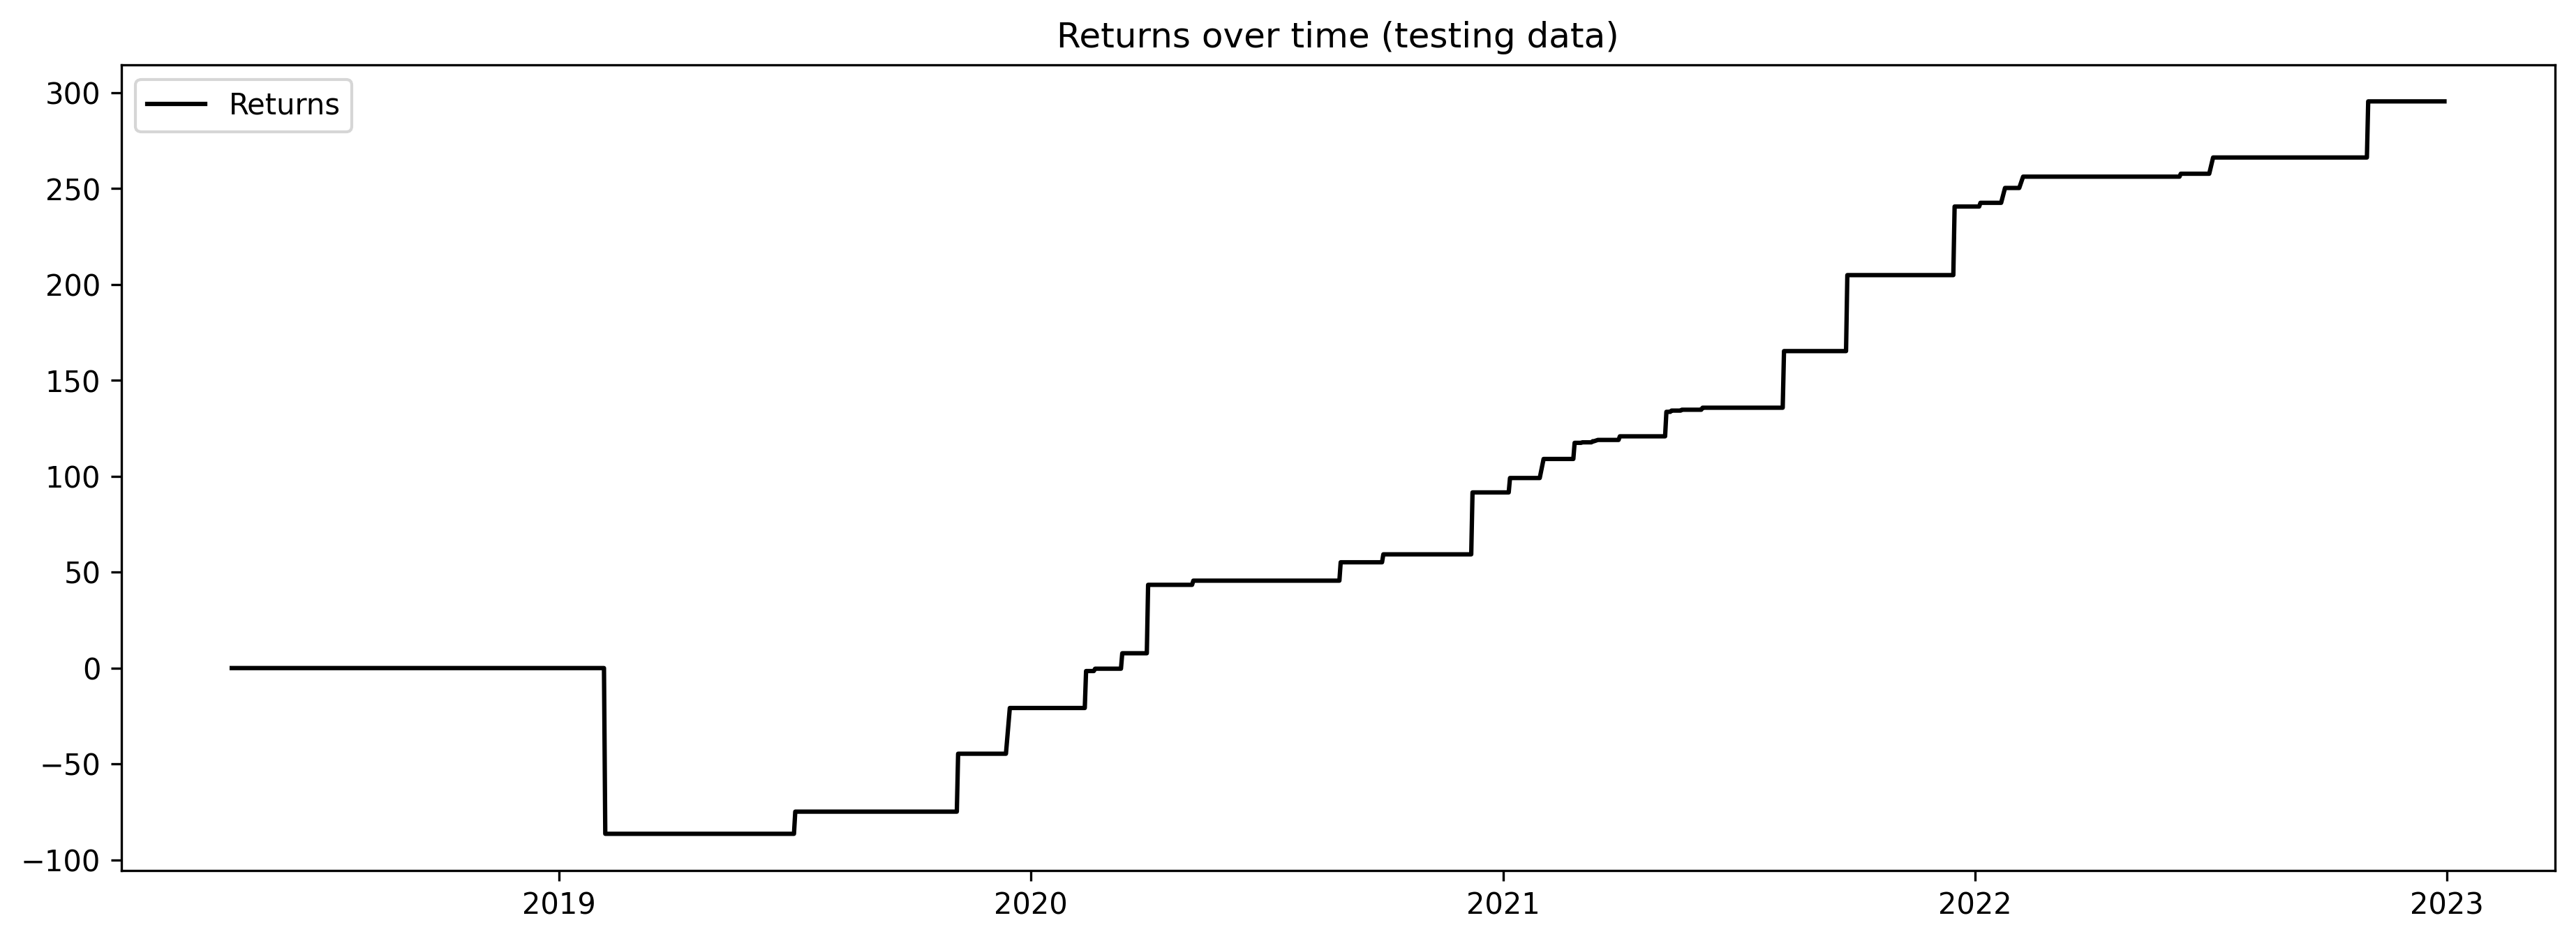

In [415]:
# 'AWC.AX', 'BSL.AX'
train_amount = int(round(len(data["BKW.AX"])*0.7, 0))
test_amount = len(ratio) - train_amount

S1 = data["BKW.AX"][train_amount:]
S2 = data["JHX.AX"][train_amount:]
window = 100
threshold = 0.75
exit_threshold = 0.5

total_returns, returns, amount_S1, amount_S2, initial, returns_S, amount_S1_S, amount_S2_S, buyR_S, sellR_S, ratio = trade(S1, S2, window, threshold, exit_threshold)
print("$"+str(total_returns))

# graphing the returns over time
plt.figure(figsize=(15,5))

# only start after 30 days because that is when the moving averages "start"
plt.title("Returns over time (testing data)")
plt.plot(returns_S.index, returns_S.values, color='black')
plt.legend(['Returns'])
plt.show()

# All time

$673.2960854502259 (100.0%)


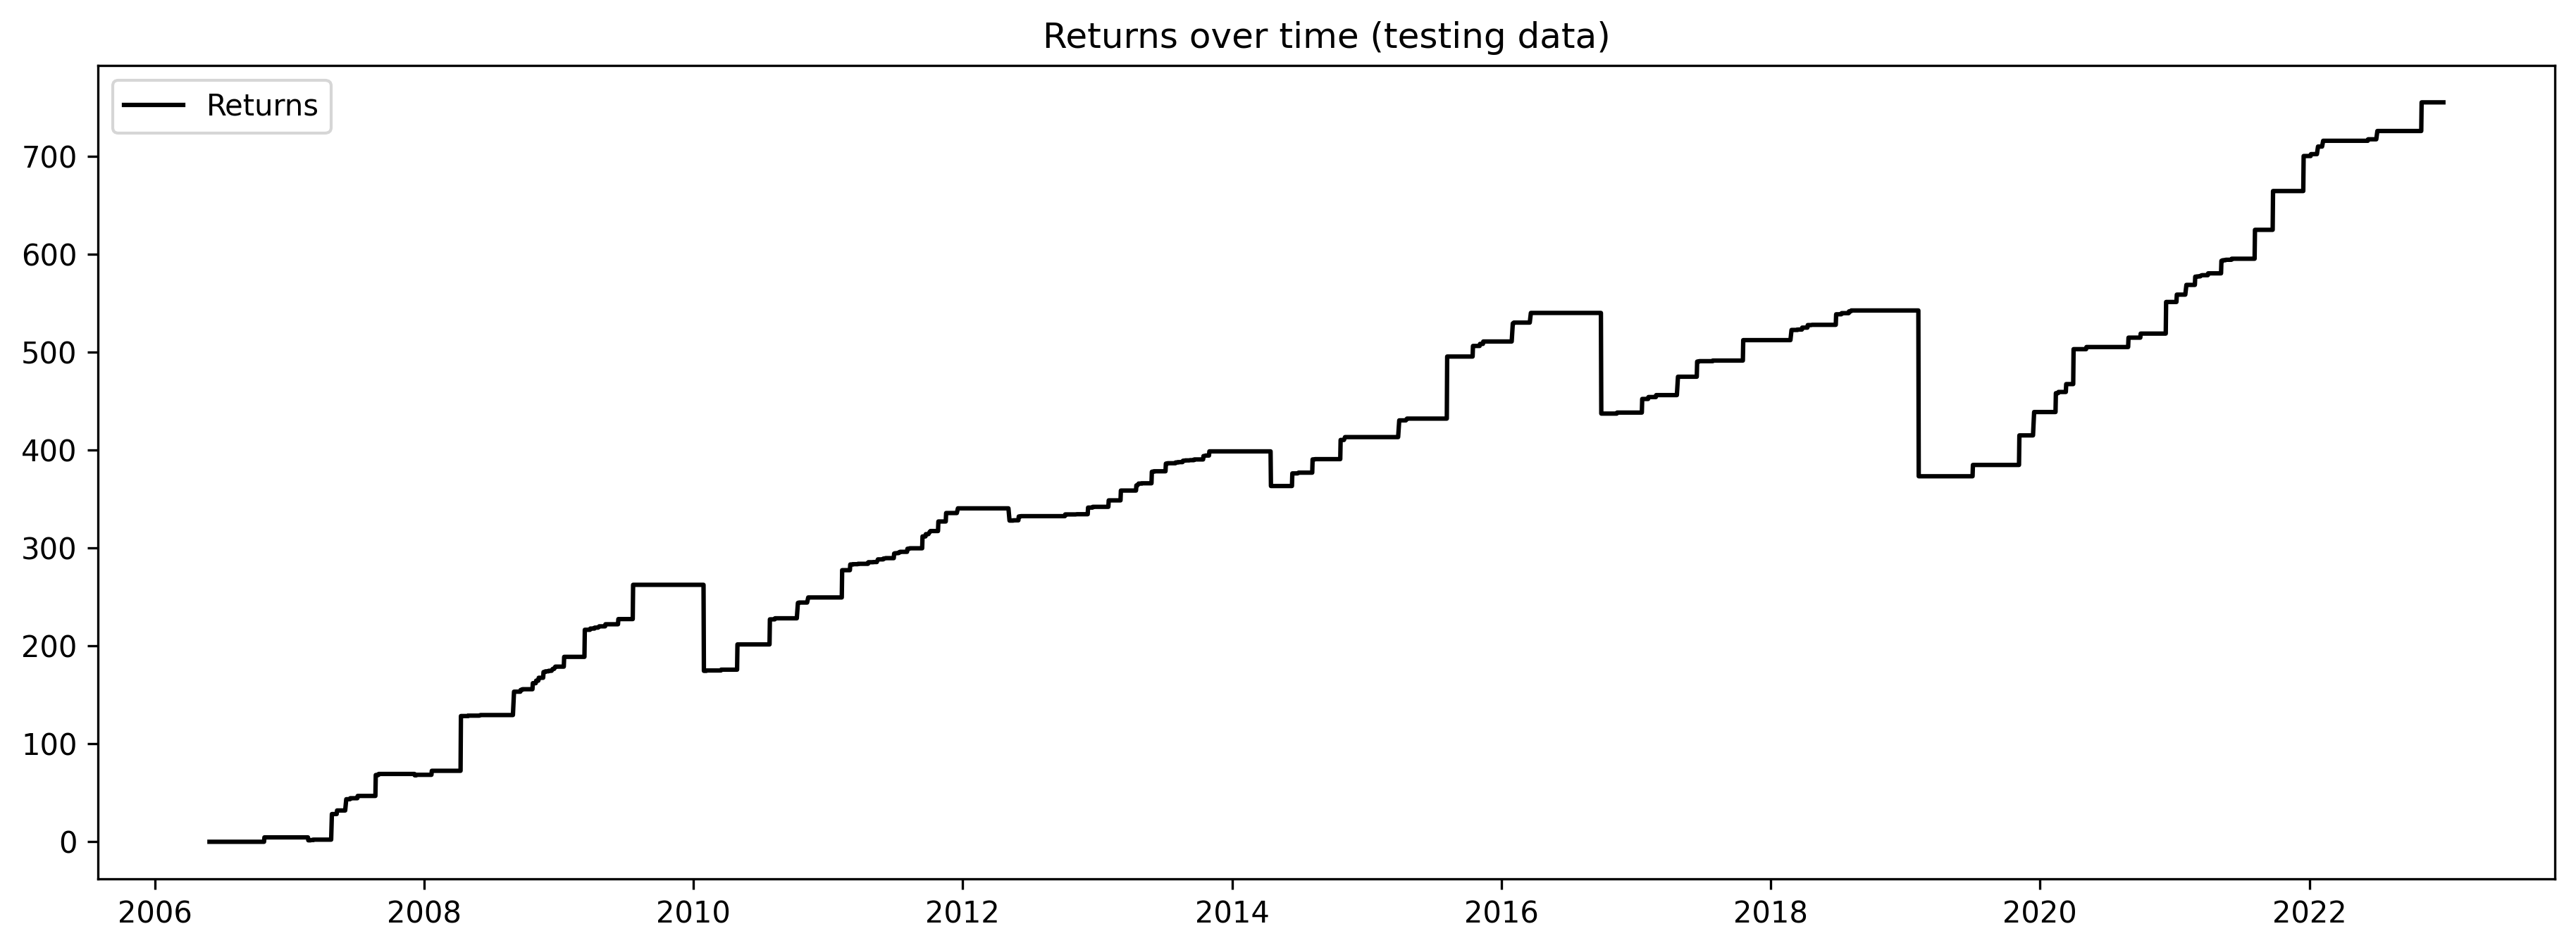

In [440]:

train_amount = int(round(len(data["BKW.AX"])*0.7, 0))
test_amount = len(ratio) - train_amount

S1 = data["BKW.AX"]
S2 = data["JHX.AX"]
window = 100
threshold = 0.75
exit_threshold = 0.5
start_S1 = 0
start_S2 = 0

total_returns, returns, amount_S1, amount_S2, initial, returns_S, amount_S1_S, amount_S2_S, buyR_S, sellR_S, ratio = trade(S1, S2, window, threshold, exit_threshold, start_S1=start_S1, start_S2=start_S2)
print(f"${total_returns-initial} ({round(((total_returns-initial)/total_returns)*100, 2)}%)")

# graphing the returns over time
plt.figure(figsize=(15,5))

# only start after 30 days because that is when the moving averages "start"
plt.title("Returns over time (testing data)")
plt.plot(returns_S.index, returns_S.values, color='black')
plt.legend(['Returns'])
plt.show()

# Testing other stocks

$139.33854729574682


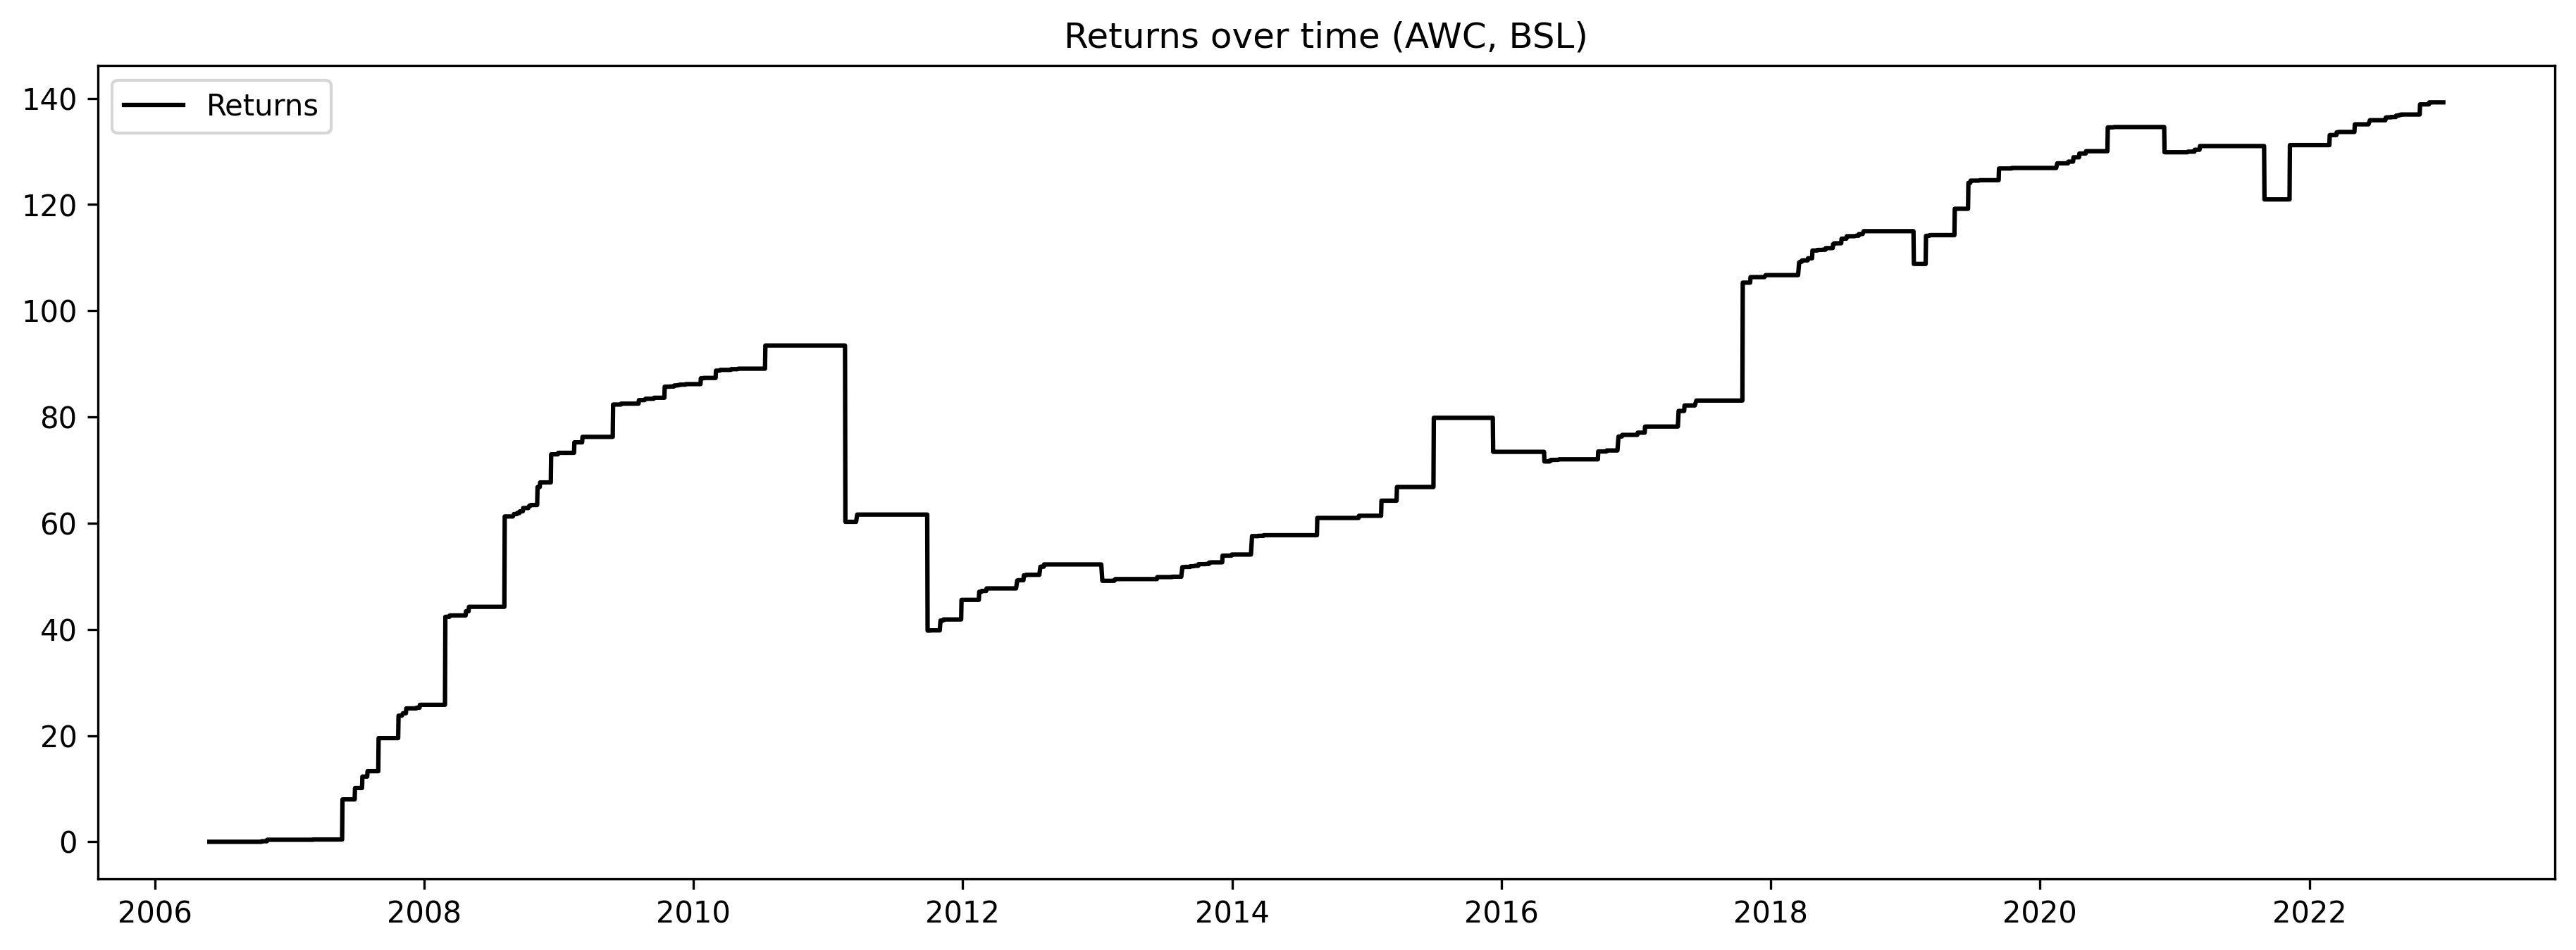

In [416]:
# 'AWC.AX', 'BSL.AX'
# train_amount = int(round(len(data["AWC.AX"])*0.7, 0))
# test_amount = len(ratio) - train_amount

def moving_data(data, window, std=False, z=False, min_periods=None):
    # min periods is to prevent having no data at start
    d_ma = data.rolling(window=window, center=False, min_periods=None).mean()
    if std or z:
        d_std = data.rolling(window=window, center=False, min_periods=None).std()
        if std:
            return d_ma, d_std
    if z:
        d_z = (data-d_ma)/d_std
        return d_ma, d_std, d_z
    return d_ma

S1 = data["AWC.AX"]#[train_amount:]
S2 = data["BSL.AX"]#train_amount:]
window=100
threshold = 0.75
exit_threshold = 0.5

total_returns, returns, amount_S1, amount_S2, initial, returns_S, amount_S1_S, amount_S2_S, buyR_S, sellR_S, ratio = trade(S1, S2, window, threshold, exit_threshold)
print("$"+str(total_returns))

# graphing the returns over time
plt.figure(figsize=(15,5))

# only start after 30 days because that is when the moving averages "start"
plt.title("Returns over time (AWC, BSL)")
plt.plot(returns_S.index, returns_S.values, color='black')
plt.legend(['Returns'])
plt.show()

# Testing different starting stock amounts

In [417]:
train_amount = int(round(len(data["BKW.AX"])*0.7, 0))
test_amount = len(ratio) - train_amount

S1 = data["BKW.AX"][train_amount:]
S2 = data["JHX.AX"][train_amount:]
window = 100
threshold = 0.75
exit_threshold = 0.5
start_S1 = 0
start_S2 = 0

total_returns, returns, amount_S1, amount_S2, initial, returns_S, amount_S1_S, amount_S2_S, buyR_S, sellR_S, ratio = trade(S1, S2, window, threshold, exit_threshold, start_S1=start_S1, start_S2=start_S2)
total_returns-initial, total_returns, initial

(213.54061965388337, 213.54061965388337, 0.0)

In [ ]:
# figure out how to drop data will null columns
# compare the 50 stocks
# find the most cointegrated pair
# visualise the relationship
# calculate performance on test data
# optimise the window length
# test returns on test data

# research the recommended topics from quantopian tutorial and eventuall integrate them
# make it into one big python file with a two stock input

# reinvest dividends

In [ ]:
# finding the smallest p value
target = pvalues.min()
shape = np.shape(pvalues)
for r in range(shape[0]): # row
    for c in range(shape[1]): # column
        if pvalues[r][c] == target:
            print(stockNames[r], stockNames[c])
            print(target)
# score1, pvalue1 = coint(data['S32.AX'], data['ORI.AX'])



BKW.AX JHX.AX
0.0010952863567967187
